In [ ]:
import json
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import r2_score

In [ ]:
def rank_xform(c):
    return c.rank(axis=0, method="average")

def sqrt_xform(c):
    return np.sqrt(c)

In [ ]:
df1 = pd.read_csv("./rsivl_features.csv")
df2 = pd.read_pickle("./rsivl_dataframe.p")

In [ ]:
df2["filename"] = df2["filename"].apply(lambda x: x[:-4])
df2 = df2.sort_values("filename")
df1 = df1[df1["image"] != "imm(20)"]
df2 = df2.drop(["4points", "8points", "16points", "32points","64points", "complexity", "computed_average"], axis=1)
df1 = df1.rename(columns={"complexity_rating": "complexity_paper_averages"})

In [ ]:
df = pd.concat([df1.set_index('image'), df2.set_index('filename')], axis=1, join='inner')
df.shape

In [ ]:
df.to_pickle("./rsivl_df.p")

# Remove Outliers

In [ ]:
participants = list(range(1, 27))
participants = [x for x in participants if x not in [13, 17, 18, 26]]
df["complexity_no_outliers"] = df[["participant{}".format(i) for i in participants]].mean(axis=1)

In [ ]:
def report_correlations(x, y):
    model = np.poly1d(np.polyfit(x, y, 1))
    print(stats.pearsonr(x, y), stats.spearmanr(x, y), r2_score(y, model(x)))

In [ ]:
report_correlations(df["complexity_no_outliers"], df["num_seg_5"])
report_correlations(df["complexity_paper_averages"], df["num_seg_5"])

In [ ]:
report_correlations(df["complexity_no_outliers"], df["num_seg_4"])
report_correlations(df["complexity_paper_averages"], df["num_seg_4"])

# Visualization

In [ ]:
def plot_scatter(x, y):
    plt.scatter(x, y);
    model = np.poly1d(np.polyfit(x, y, 1))
    plt.plot(x, model(x), color="r", label="Pearson {:.3f}, R^2 {:.3f}".format(stats.pearsonr(x, y).statistic, r2_score(y, model(x))))
    plt.legend()

In [ ]:
plot_scatter(df["num_seg_5"], df["complexity_no_outliers"])

In [ ]:
plot_scatter(rank_xform(df["num_seg_5"]), rank_xform(df["complexity_no_outliers"]))

In [ ]:
plot_scatter(rank_xform(df["num_seg_5"]), df["complexity_no_outliers"])

In [ ]:
plot_scatter(df["num_seg_5"], sqrt_xform(df["complexity_no_outliers"]))

In [ ]:
plot_scatter(rank_xform(df["num_seg_5"]), sqrt_xform(df["complexity_no_outliers"]))

# Regression

In [14]:
def fit_report_linear(X, y, silent=False):
    model = linear_model.LinearRegression()
    model.fit(X, y)

    betas = model.coef_
    t = stats.pearsonr(y, model.predict(X))
    pearson_stat = t.statistic
    pearson_p = t.pvalue
    t = stats.spearmanr(y, model.predict(X))
    spearman_stat = t.statistic
    spearman_p = t.pvalue
    r2 = r2_score(y, model.predict(X))

    if not silent:
        print("Pearson: {:.3f} p={}, Spearman: {:.3f} p={}, R^2: {:.3f}".format(
            pearson_stat, pearson_p, spearman_stat, spearman_p, r2
        ))

    return pearson_stat, pearson_p, spearman_stat, spearman_p, r2, betas    

## Try other levels

In [ ]:
X, y = df[["num_seg_5"]], df["complexity_no_outliers"]
fit_report_linear(X, y);

In [ ]:
X, y = df[["num_seg_5", "num_seg_3"]], df["complexity_no_outliers"]
fit_report_linear(X, y);

In [ ]:
X, y = rank_xform(df[["num_seg_5"]]), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = rank_xform(df[["num_seg_5", "num_seg_4"]]), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = rank_xform(df[["num_seg_5", "num_seg_3"]]), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = rank_xform(df[["num_seg_5", "num_seg_2"]]), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = rank_xform(df[["num_seg_5", "num_seg_1"]]), df["complexity_no_outliers"]
fit_report_linear(X, y)

In [ ]:
X, y = pd.concat([rank_xform(df["num_seg_5"]), df["num_seg_3"]], axis=1), df["complexity_no_outliers"]
fit_report_linear(X, y)

## Try segment labels

In [ ]:
df["temp"] = rank_xform(df["num_seg_5"]) * rank_xform(df["num_unique_seglabels"])

X, y = rank_xform(df[["num_seg_5"]]), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = pd.concat([rank_xform(df["num_seg_5"]), df["num_unique_seglabels"]], axis=1), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = pd.concat([rank_xform(df["num_seg_5"]), df["num_unique_seglabels"], rank_xform(df["temp"])], axis=1), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = pd.concat([rank_xform(df["num_seg_5"]), rank_xform(df["num_unique_seglabels"]), rank_xform(df["temp"])], axis=1), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = rank_xform(df[["num_seg_5", "num_unique_seglabels"]]), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = rank_xform(df[["temp"]]), df["complexity_no_outliers"]
fit_report_linear(X, y);

In [ ]:
X, y = rank_xform(df[["num_seg_4"]]), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = pd.concat([rank_xform(df["num_seg_4"]), df["num_unique_seglabels"]], axis=1), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = pd.concat([rank_xform(df["num_seg_4"]), df["num_unique_seglabels"], rank_xform(df["temp"])], axis=1), df["complexity_no_outliers"]
fit_report_linear(X, y);

In [ ]:
X, y = pd.concat([rank_xform(df["num_seg_4"]), df["semsim"]], axis=1), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = rank_xform(df[["num_seg_4", "semsim"]]), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = rank_xform(df[["num_seg_4", "num_unique_seglabels", "semsim"]]), df["complexity_no_outliers"]
fit_report_linear(X, y)
X, y = pd.concat([rank_xform(df[["num_seg_4", "num_unique_seglabels"]]), df["semsim"]], axis=1), df["complexity_no_outliers"]
fit_report_linear(X, y);

# Participant Fits

In [ ]:
def participant_fit_variable_gain(fixed_variables, test_variables):

    results = {}
    for i in participants:
        results[i] = {}
        
        X = rank_xform(df[fixed_variables])
        y = rank_xform(df["participant{}".format(i)])
        results[i]["baseline"] = fit_report_linear(X, y, silent=True)

        for v in test_variables:
            X = rank_xform(df[fixed_variables + [v]])
            results[i][v] = fit_report_linear(X, y, silent=True)

    for v in test_variables:
        # plt.figure()
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        data = [x[v][-2]-x['baseline'][-2] for _, x in results.items()]
        bin_width = 0.005
        axs[0].hist(data, bins=np.arange(min(data), max(data)+bin_width, bin_width))
        axs[1].boxplot(data)
        axs[0].set_title("{} add {}".format(fixed_variables, v))

    data = [[x[v][-2]-x['baseline'][-2] for _, x in results.items()] for v in test_variables]
    plt.figure()
    plt.boxplot(data)

    data = [max([a[-2] for a in x.values()])-x['baseline'][-2] for _, x in results.items()]
    plt.figure()
    plt.hist(data)

    return results

In [ ]:
fixed_variables = ["num_seg_5"]
test_variables = ["num_seg_1", "num_seg_2", "num_seg_3", "num_seg_4", "num_seg_5"]
results = participant_fit_variable_gain(fixed_variables, test_variables)

In [ ]:
fixed_variables = ["num_seg_4"]
test_variables = ["num_seg_1", "num_seg_2", "num_seg_3", "num_seg_4", "num_seg_5", "num_unique_seglabels", "semsim"]
participant_fit_variable_gain(fixed_variables, test_variables)

In [ ]:
fixed_variables = ["num_seg_5", "num_unique_seglabels"]
test_variables = ["num_seg_1", "num_seg_2", "num_seg_3", "num_seg_4", "num_seg_5", "semsim"]
participant_fit_variable_gain(fixed_variables, test_variables)

In [ ]:
fixed_variables = ["num_seg_4", "num_unique_seglabels"]
test_variables = ["num_seg_1", "num_seg_2", "num_seg_3", "num_seg_4", "num_seg_5", "semsim"]
participant_fit_variable_gain(fixed_variables, test_variables)

# Savoias Dataset Class Information

In [ ]:
def load_complexity_scores():
    sav_obj = "/ptmp/tshen/shared/Savoias/labels/xlsx/global_ranking_objects.xlsx"
    sav_sce = "/ptmp/tshen/shared/Savoias/labels/xlsx/global_ranking_scenes.xlsx"

    labels = {}
    for v, n in zip([sav_obj, sav_sce], ["sav_obj", "sav_sce"]):
        labels[n] = pd.read_excel(v)
        labels[n].rename(columns={'gt': 'complexity'}, inplace=True)
        labels[n]['filename'] = ["{}.jpg".format(i) for i in range(len(labels[n]))]

    for k in labels.keys():
        assert labels[k][['filename', 'complexity']].isnull().values.any() == False

    return labels

In [ ]:
def load_predictions(folder="../out/2023July20", filenames=['4points', '8points', '16points', '32points', '64points']):
    sav_obj = "{}/Savoias-Objects".format(folder)
    sav_sce = "{}/Savoias-Scenes".format(folder)

    preds = {}
    
    for v, n in zip([sav_obj, sav_sce], ["sav_obj", "sav_sce"]):
        preds_dataset = []
        single_file_len = 0

        for f in filenames:
            df = pd.read_csv("{}/{}.csv".format(v, f), names=["filename", f], header=None)
            preds_dataset.append(df)
            single_file_len = len(df)

        combined_df = pd.concat([df.set_index("filename") for df in preds_dataset], axis=1, join='inner').reset_index()  # join on filename
        assert len(combined_df) == single_file_len
        assert combined_df.isnull().values.any() == False

        preds[n] = combined_df

    for k in ["sav_obj", "sav_sce"]:
        preds[k]['filename'] = preds[k]['filename'].str.replace('.json', '.jpg', regex=False)

    return preds

In [ ]:
def join_preds_labels(preds, labels):
    data = {}
    
    for k in ["sav_obj", "sav_sce"]:
        data[k] = pd.concat([preds[k].set_index("filename"), labels[k][['filename', 'complexity']].set_index("filename")], axis=1, join='inner').reset_index()
        assert len(data[k]) == len(preds[k]) == len(labels[k])
        assert data[k].isnull().values.any() == False

    return data

In [77]:
def load_unique_class(fpath='./savois_filtered_classes.json'):

    class_labels = {}
    
    with open(fpath, 'r') as f:
        d = json.load(f)
    
    class_labels['sav_obj'] = pd.DataFrame([[k, len(v)] for k, v in d['objects'].items()], columns=["filename", "num_uniqe_classes_filtered"])
    class_labels['sav_sce'] = pd.DataFrame([[k, len(v)] for k, v in d['scenes'].items()], columns=["filename", "num_uniqe_classes_filtered"])

    return class_labels

def join_data_class(data, labels):
    data_class = {}
    data_class["sav_obj"] = pd.concat([labels["sav_obj"].set_index("filename"), data["sav_obj"].set_index("filename")], axis=1, join='inner').reset_index()
    data_class["sav_sce"] = pd.concat([labels["sav_sce"].set_index("filename"), data["sav_sce"].set_index("filename")], axis=1, join='inner').reset_index()

    return data_class

In [ ]:
levels = ['4points', '8points', '16points', '32points', '64points']

In [ ]:
preds = load_predictions(folder="../out/2023July20", filenames=levels)
labels = load_complexity_scores()
data = join_preds_labels(preds, labels)
class_labels = load_unique_class()
data_class = join_data_class(data, class_labels)

In [36]:
df = data["sav_obj"]

In [37]:
X, y = rank_xform(df[["64points"]]), df["complexity"]
fit_report_linear(X, y);
X, y = rank_xform(df[["32points"]]), df["complexity"]
fit_report_linear(X, y);
X, y = rank_xform(df[["16points"]]), df["complexity"]
fit_report_linear(X, y);
X, y = rank_xform(df[["16points", "64points"]]), df["complexity"]
fit_report_linear(X, y);

Pearson: 0.742 p=3.3941010636920085e-36, Spearman: 0.742 p=2.7899969533889442e-36, R^2: 0.550
Pearson: 0.730 p=1.3756375742051692e-34, Spearman: 0.731 p=9.381221199815628e-35, R^2: 0.533
Pearson: 0.636 p=4.243152988722552e-24, Spearman: 0.643 p=1.0111615442408717e-24, R^2: 0.405
Pearson: 0.742 p=3.3486623822045954e-36, Spearman: 0.742 p=2.8229594198759906e-36, R^2: 0.550


In [38]:
df = data["sav_sce"]

In [46]:
X, y = rank_xform(df[["64points"]]), df["complexity"]
fit_report_linear(X, y);
X, y = rank_xform(df[["32points"]]), df["complexity"]
fit_report_linear(X, y);
X, y = rank_xform(df[["16points"]]), df["complexity"]
fit_report_linear(X, y);
X, y = rank_xform(df[["4points", "32points"]]), df["complexity"]
fit_report_linear(X, y);

Pearson: 0.677 p=4.094755039872801e-28, Spearman: 0.674 p=7.784276153746107e-28, R^2: 0.458
Pearson: 0.714 p=1.8858532305724045e-32, Spearman: 0.713 p=2.69220544760113e-32, R^2: 0.509
Pearson: 0.697 p=2.2361119591890313e-30, Spearman: 0.694 p=4.447460763007627e-30, R^2: 0.485
Pearson: 0.723 p=1.3377122329062124e-33, Spearman: 0.723 p=1.2917466869282963e-33, R^2: 0.522


## Dataset Similarity

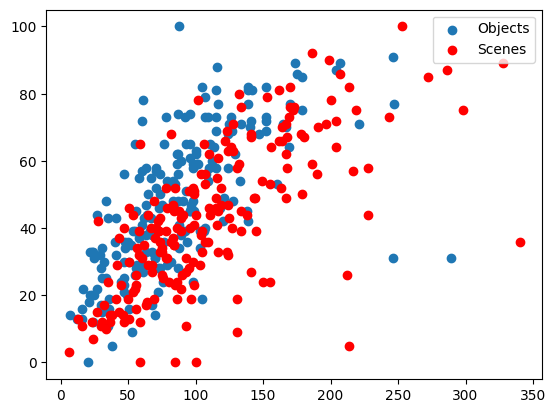

In [203]:
fig, ax = plt.subplots()
x, y = data["sav_obj"]["32points"], data["sav_obj"]["complexity"]
ax.scatter(x, y, label="Objects");
x, y = data["sav_sce"]["32points"], data["sav_sce"]["complexity"]
ax.scatter(x, y, color="red", label="Scenes");
ax.legend()

## Object Dataset only

In [168]:
df = data_class["sav_obj"]

In [169]:
X, y = rank_xform(df[["32points"]]), df["complexity"]
fit_report_linear(X, y);
X, y = rank_xform(df[["32points", "num_uniqe_classes_filtered"]]), df["complexity"]
fit_report_linear(X, y);
X, y = rank_xform(df[["num_uniqe_classes_filtered"]]), df["complexity"]
fit_report_linear(X, y);
X, y = pd.DataFrame(rank_xform(rank_xform(df["num_uniqe_classes_filtered"])*rank_xform(df["32points"]))), df["complexity"]
fit_report_linear(X, y);

Pearson: 0.330 p=0.10772453964285927, Spearman: 0.290 p=0.16040535063674735, R^2: 0.109
Pearson: 0.799 p=1.7031308099287982e-06, Spearman: 0.806 p=1.1321324150511325e-06, R^2: 0.638
Pearson: 0.790 p=2.6363737120134147e-06, Spearman: 0.804 p=1.2890244399213807e-06, R^2: 0.624
Pearson: 0.688 p=0.00014438180476519785, Spearman: 0.674 p=0.00022089908720289965, R^2: 0.473


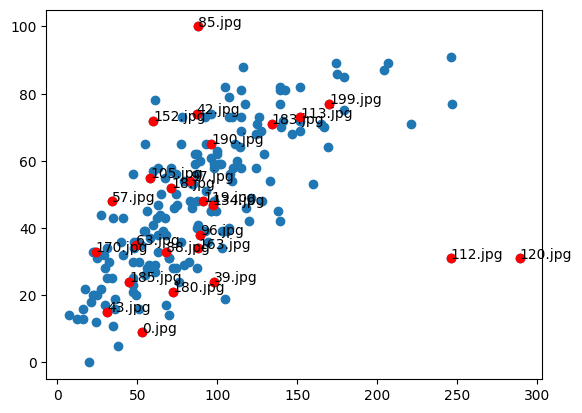

In [170]:
fig, ax = plt.subplots()
x, y = data["sav_obj"]["32points"], data["sav_obj"]["complexity"]
ax.scatter(x, y);
x, y = df["32points"], df["complexity"]
ax.scatter(x, y, color="red");
for i in df.index:
    ax.annotate(df["filename"][i], (x[i], y[i]))

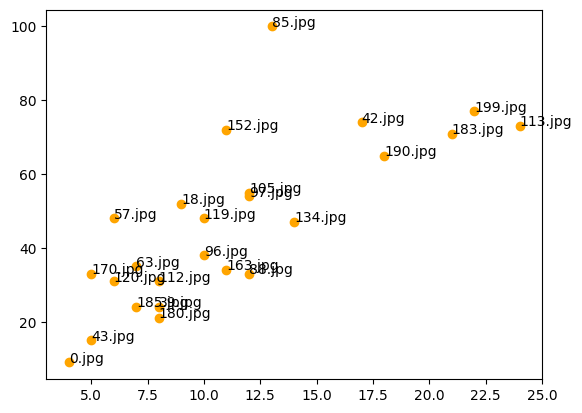

In [172]:
fig, ax = plt.subplots()
x, y = df["num_uniqe_classes_filtered"], df["complexity"]
plt.scatter(x, y, color="orange");
for i in df.index:
    ax.annotate(df["filename"][i], (x[i], y[i]))

### Remove outliers

In [180]:
df = data_class["sav_obj"]

In [181]:
df = df[~df["filename"].isin(["112.jpg", "120.jpg"])]

In [182]:
X, y = rank_xform(df[["32points"]]), df["complexity"]
fit_report_linear(X, y);
X, y = rank_xform(df[["32points", "num_uniqe_classes_filtered"]]), df["complexity"]
fit_report_linear(X, y);
X, y = rank_xform(df[["num_uniqe_classes_filtered"]]), df["complexity"]
fit_report_linear(X, y);
X, y = pd.DataFrame(rank_xform(rank_xform(df["num_uniqe_classes_filtered"])*rank_xform(df["32points"]))), df["complexity"]
fit_report_linear(X, y);

Pearson: 0.495 p=0.016428279833147312, Spearman: 0.499 p=0.015351749460133322, R^2: 0.245
Pearson: 0.805 p=3.5680759783861302e-06, Spearman: 0.833 p=8.279705958717259e-07, R^2: 0.648
Pearson: 0.785 p=9.13337328886797e-06, Spearman: 0.796 p=5.610564050750764e-06, R^2: 0.616
Pearson: 0.699 p=0.00020404071893172048, Spearman: 0.709 p=0.00015365743737770065, R^2: 0.489


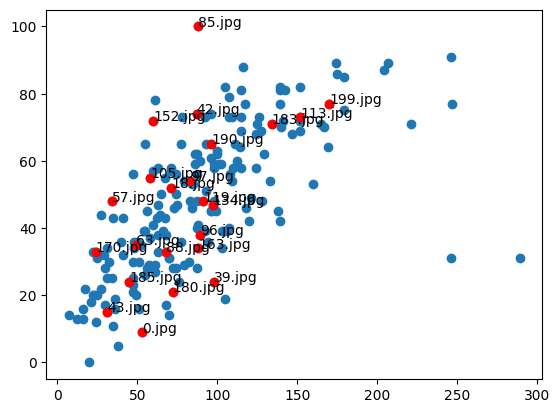

In [183]:
fig, ax = plt.subplots()
x, y = data["sav_obj"]["32points"], data["sav_obj"]["complexity"]
ax.scatter(x, y);
x, y = df["32points"], df["complexity"]
ax.scatter(x, y, color="red");
for i in df.index:
    ax.annotate(df["filename"][i], (x[i], y[i]))

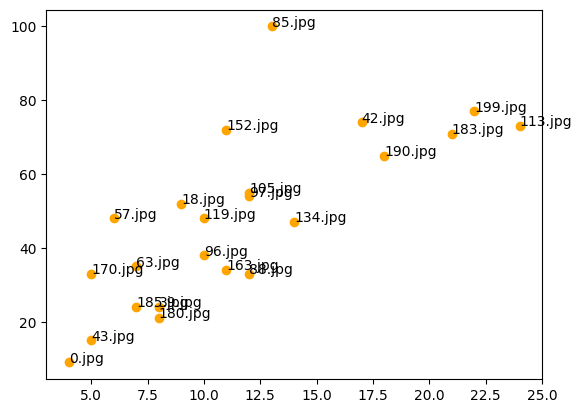

In [184]:
fig, ax = plt.subplots()
x, y = df["num_uniqe_classes_filtered"], df["complexity"]
plt.scatter(x, y, color="orange");
for i in df.index:
    ax.annotate(df["filename"][i], (x[i], y[i]))

## Scene Dataset only

In [185]:
df = data_class["sav_sce"]

In [186]:
X, y = rank_xform(df[["32points"]]), df["complexity"]
fit_report_linear(X, y);
X, y = rank_xform(df[["32points", "num_uniqe_classes_filtered"]]), df["complexity"]
fit_report_linear(X, y);
X, y = rank_xform(df[["num_uniqe_classes_filtered"]]), df["complexity"]
fit_report_linear(X, y);
X, y = pd.DataFrame(rank_xform(rank_xform(df["num_uniqe_classes_filtered"])*rank_xform(df["32points"]))), df["complexity"]
fit_report_linear(X, y);

Pearson: 0.836 p=2.0224064742012861e-07, Spearman: 0.825 p=3.8086017904767535e-07, R^2: 0.698
Pearson: 0.885 p=4.362048140219437e-09, Spearman: 0.876 p=9.475082859518686e-09, R^2: 0.783
Pearson: 0.839 p=1.5667171043357596e-07, Spearman: 0.856 p=4.8154148426424414e-08, R^2: 0.705
Pearson: 0.877 p=8.623705605666355e-09, Spearman: 0.874 p=1.1607145616029646e-08, R^2: 0.770


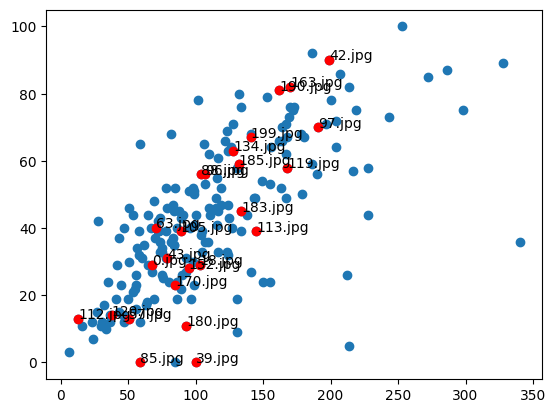

In [194]:
fig, ax = plt.subplots()
x, y = data["sav_sce"]["32points"], data["sav_sce"]["complexity"]
ax.scatter(x, y);
x, y = df["32points"], df["complexity"]
ax.scatter(x, y, color="red");
for i in df.index:
    ax.annotate(df["filename"][i], (x[i], y[i]))

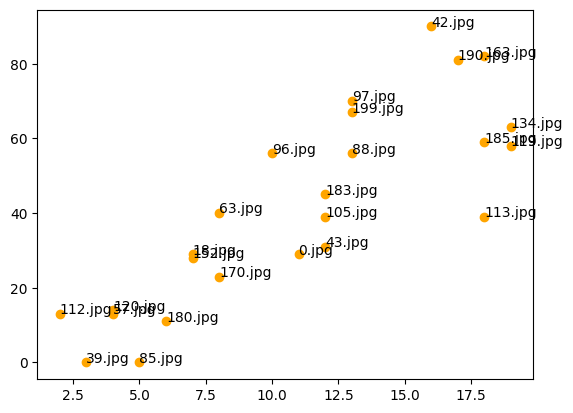

In [195]:
fig, ax = plt.subplots()
x, y = df["num_uniqe_classes_filtered"], df["complexity"]
plt.scatter(x, y, color="orange");
for i in df.index:
    ax.annotate(df["filename"][i], (x[i], y[i]))

## Dataset Similarity

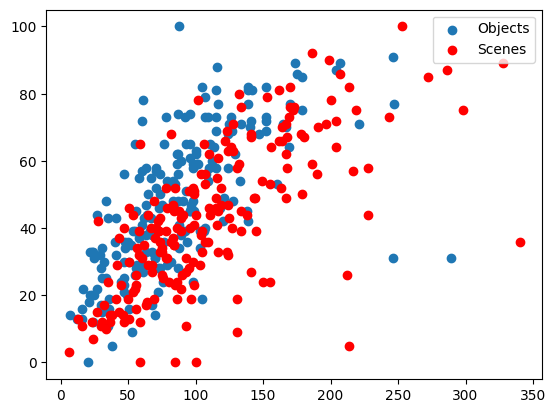

In [198]:
fig, ax = plt.subplots()
x, y = data["sav_obj"]["32points"], data["sav_obj"]["complexity"]
ax.scatter(x, y, label="Objects");
x, y = data["sav_sce"]["32points"], data["sav_sce"]["complexity"]
ax.scatter(x, y, color="red", label="Scenes");
ax.legend()

## Both Datasets only

In [199]:
df = pd.concat([data_class["sav_obj"], data_class["sav_sce"]], ignore_index=True)

In [202]:
X, y = rank_xform(df[["32points"]]), df["complexity"]
fit_report_linear(X, y);
X, y = rank_xform(df[["32points", "num_uniqe_classes_filtered"]]), df["complexity"]
fit_report_linear(X, y);
X, y = rank_xform(df[["num_uniqe_classes_filtered"]]), df["complexity"]
fit_report_linear(X, y);
X, y = pd.DataFrame(rank_xform(rank_xform(df["num_uniqe_classes_filtered"])*rank_xform(df["32points"]))), df["complexity"]
fit_report_linear(X, y);

Pearson: 0.508 p=0.00016720739595377912, Spearman: 0.514 p=0.00013680135942762656, R^2: 0.258
Pearson: 0.820 p=3.409419505375968e-13, Spearman: 0.844 p=1.4388453387700702e-14, R^2: 0.672
Pearson: 0.820 p=3.415575376593919e-13, Spearman: 0.840 p=2.512377233206005e-14, R^2: 0.672
Pearson: 0.755 p=2.2942286866357953e-10, Spearman: 0.770 p=6.519929015857388e-11, R^2: 0.571


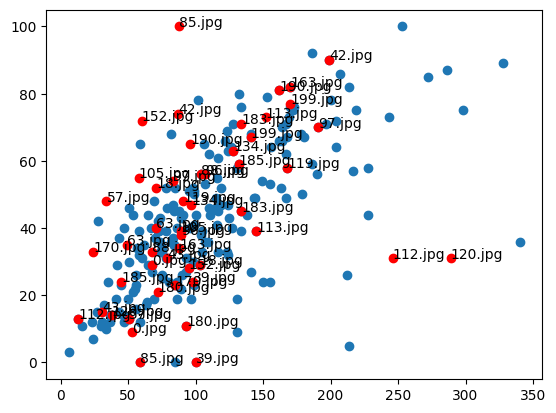

In [200]:
fig, ax = plt.subplots()
x, y = data["sav_sce"]["32points"], data["sav_sce"]["complexity"]
ax.scatter(x, y);
x, y = df["32points"], df["complexity"]
ax.scatter(x, y, color="red");
for i in df.index:
    ax.annotate(df["filename"][i], (x[i], y[i]))

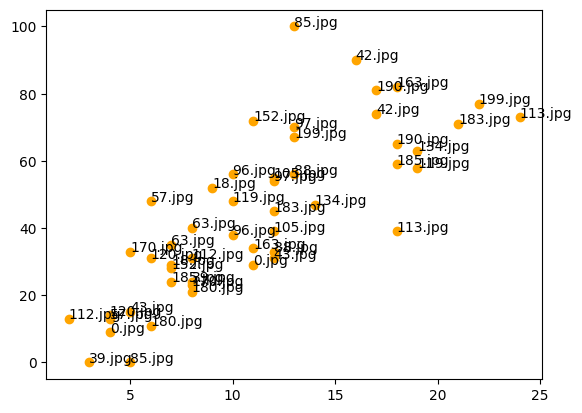

In [201]:
fig, ax = plt.subplots()
x, y = df["num_uniqe_classes_filtered"], df["complexity"]
plt.scatter(x, y, color="orange");
for i in df.index:
    ax.annotate(df["filename"][i], (x[i], y[i]))